In [14]:
from keras.models import load_model
import pickle
import keras
from matplotlib import pyplot as plt

In [4]:
with open('D:\Project\Traffic Sign Detection\DATABASE/data0.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

x_train = data['x_train']
x_test = data['x_test']
x_valid = data['x_validation']
train_labels = data['y_train']
test_labels = data['y_test']
valid_labels = data['y_validation']


num_class_shape = 43

# One Hot Encoding
# gray_y_train = keras.utils.to_categorical(gray_train_labels, num_class_shape)
y_test = keras.utils.to_categorical(test_labels, num_class_shape)
y_train = keras.utils.to_categorical(train_labels, num_class_shape)
y_valid = keras.utils.to_categorical(valid_labels, num_class_shape)

In [21]:
keras.backend.clear_session()

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras import regularizers

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5),
                activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5),
                activation='softmax'))

In [23]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, batch_size=256, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
340/340 [==============================] - 15s 41ms/step - loss: 3.0343 - accuracy: 0.3615 - val_loss: 0.6839 - val_accuracy: 0.8707
Epoch 2/20
340/340 [==============================] - 13s 39ms/step - loss: 0.7251 - accuracy: 0.8507 - val_loss: 0.3675 - val_accuracy: 0.9580
Epoch 3/20
340/340 [==============================] - 13s 39ms/step - loss: 0.4573 - accuracy: 0.9270 - val_loss: 0.3281 - val_accuracy: 0.9680
Epoch 4/20
340/340 [==============================] - 13s 39ms/step - loss: 0.3741 - accuracy: 0.9501 - val_loss: 0.3159 - val_accuracy: 0.9714
Epoch 5/20
340/340 [==============================] - 13s 39ms/step - loss: 0.3237 - accuracy: 0.9625 - val_loss: 0.2866 - val_accuracy: 0.9764
Epoch 6/20
340/340 [==============================] - 13s 39ms/step - loss: 0.2967 - accuracy: 0.9690 - val_loss: 0.2773 - val_accuracy: 0.9796
Epoch 7/20
340/340 [==============================] - 14s 40ms/step - loss: 0.2755 - accuracy: 0.9731 - val_loss: 0.2581 - val_accuracy:

In [25]:
from sklearn.metrics import classification_report
pred = model.predict(x_test).argmax(axis = 1)
cr = classification_report(y_test.argmax(axis = 1) , pred , output_dict = True) 
print(cr)

395/395 [==============================] - 1s 3ms/step
{'0': {'precision': 0.9375, 'recall': 1.0, 'f1-score': 0.967741935483871, 'support': 60}, '1': {'precision': 0.9821428571428571, 'recall': 0.9930555555555556, 'f1-score': 0.9875690607734807, 'support': 720}, '2': {'precision': 0.9894039735099338, 'recall': 0.996, 'f1-score': 0.9926910299003322, 'support': 750}, '3': {'precision': 0.9953379953379954, 'recall': 0.9488888888888889, 'f1-score': 0.9715585893060297, 'support': 450}, '4': {'precision': 0.9864457831325302, 'recall': 0.9924242424242424, 'f1-score': 0.9894259818731118, 'support': 660}, '5': {'precision': 0.9568567026194145, 'recall': 0.9857142857142858, 'f1-score': 0.9710711493354184, 'support': 630}, '6': {'precision': 1.0, 'recall': 0.9133333333333333, 'f1-score': 0.9547038327526133, 'support': 150}, '7': {'precision': 0.9888143176733781, 'recall': 0.9822222222222222, 'f1-score': 0.9855072463768116, 'support': 450}, '8': {'precision': 0.9910913140311804, 'recall': 0.988888

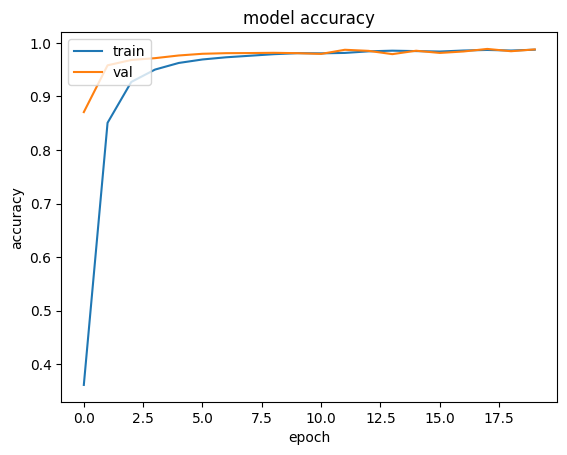

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

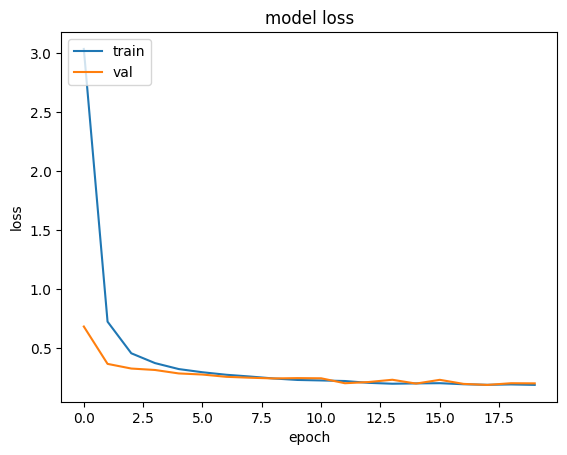

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()